### Loading Libraries

In [9]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from datetime import date
from sklearn.linear_model import HuberRegressor
import re

### Extract data

In [38]:
#Convert csv to dataframe
d_90to99 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
d_00to12 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
d_12to14 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
d_15to16 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
d_17_to_till = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

### Exploratory Data Analysis

In [39]:
#Analyse the column names
col1 = d_90to99.columns.to_list()
col2 = d_00to12.columns.to_list()
col3 = d_12to14.columns.to_list()
col4 = d_15to16.columns.to_list()
col5 = d_17_to_till.columns.to_list()
print(col1)
print(col2)
print(col3)
print(col4)
print(col5)

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']


In [40]:
#Explore datatypes of all datasets
d90_99 = d_90to99.dtypes
d00_12 = d_00to12.dtypes
d12_14= d_12to14.dtypes
d15_16 = d_15to16.dtypes
d17_till = d_17_to_till.dtypes
new = pd.DataFrame([d90_99,d00_12,d12_14,d15_16,d17_till],index = ['d90_99','d00_12','d12_14','d15_16','d17_till'])
new

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
d90_99,object,object,object,object,object,object,float64,object,int64,int64,NaN
d00_12,object,object,object,object,object,object,float64,object,int64,float64,NaN
d12_14,object,object,object,object,object,object,float64,object,int64,float64,NaN
d15_16,object,object,object,object,object,object,float64,object,int64,float64,int64
d17_till,object,object,object,object,object,object,float64,object,int64,float64,object


In [41]:
#Explore null values of all datasets
d90_99n = d_90to99.isnull().sum()
d00_12n = d_00to12.isnull().sum()
d12_14n= d_12to14.isnull().sum()
d15_16n = d_15to16.isnull().sum()
d17_tilln = d_17_to_till.isnull().sum()
nulls = pd.DataFrame([d90_99n,d00_12n,d12_14n,d15_16n,d17_tilln],index = ['d90_99','d00_12','d12_14','d15_16','d17_till'])
nulls

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
d90_99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
d00_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
d12_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
d15_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d17_till,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Number of rows in each dataset
Total_rows = d_90to99.shape[0] + d_00to12.shape[0] + d_12to14.shape[0] + d_15to16.shape[0] + d_17_to_till.shape[0]
print("d_90to99 Rows :",d_90to99.shape[0])
print("d_00to12 Rows :",d_00to12.shape[0])
print("d_12to14 Rows :",d_12to14.shape[0])
print("d_15to16 Rows :",d_15to16.shape[0])
print("d_17_to_till Rows :",d_17_to_till.shape[0])
print("Total Rows :", Total_rows)

d_90to99 Rows : 287196
d_00to12 Rows : 369651
d_12to14 Rows : 52203
d_15to16 Rows : 37153
d_17_to_till Rows : 174242
Total Rows : 920445


### Datatype conversion

In [43]:
#Datatype converison
#Converting month column from object to datetime
d_90to99['month'] = pd.to_datetime(d_90to99['month'],format='%Y-%m')
d_00to12['month'] = pd.to_datetime(d_00to12['month'],format='%Y-%m')
d_12to14['month'] = pd.to_datetime(d_12to14['month'],format='%Y-%m')
d_15to16['month'] = pd.to_datetime(d_15to16['month'],format='%Y-%m')
d_17_to_till['month'] = pd.to_datetime(d_17_to_till['month'],format='%Y-%m')

#Converting lease commencement date to year
d_90to99['lease_commence_date'] = pd.to_datetime(d_90to99['lease_commence_date'],format='%Y')
d_00to12['lease_commence_date'] = pd.to_datetime(d_00to12['lease_commence_date'],format='%Y')
d_12to14['lease_commence_date'] = pd.to_datetime(d_12to14['lease_commence_date'],format='%Y')
d_15to16['lease_commence_date'] = pd.to_datetime(d_15to16['lease_commence_date'],format='%Y')
d_17_to_till['lease_commence_date'] = pd.to_datetime(d_17_to_till['lease_commence_date'],format='%Y')

#Converting resale price to int
d_90to99['resale_price'] =d_90to99['resale_price'].astype('int')
d_00to12['resale_price'] =d_00to12['resale_price'].astype('int')
d_12to14['resale_price'] = d_12to14['resale_price'].astype('int')
d_15to16['resale_price'] = d_15to16['resale_price'].astype('int')
d_17_to_till['resale_price'] = d_17_to_till['resale_price'].astype('int')

#Singapore Housing and Development Board allocates/sells homes to public for 99 years of lease
#Creating new column remaining_lease by finding difference bw lease year of 99 years and elapsed years from commencement
#Elapsed year found by resale date i.e., month column - lease commence date 
d_90to99['remaining_lease'] = 99*12 - (12 * (d_90to99['month'].dt.year - d_90to99['lease_commence_date'].dt.year) + (d_90to99['month'].dt.month - d_90to99['lease_commence_date'].dt.month))
d_00to12['remaining_lease'] = 99*12 - (12 * (d_00to12['month'].dt.year - d_00to12['lease_commence_date'].dt.year) + (d_00to12['month'].dt.month - d_00to12['lease_commence_date'].dt.month))
d_12to14['remaining_lease'] = 99*12 - (12 * (d_12to14['month'].dt.year - d_12to14['lease_commence_date'].dt.year) + (d_12to14['month'].dt.month - d_12to14['lease_commence_date'].dt.month))

#Conversion of d_15to16['remaining lease'] in year format to months
d_15to16['remaining_lease'] = d_15to16['remaining_lease']*12

#Conversion of d_17_to_till['remaining_lease'] in words format like(ex : 24 years 4 months) 
#Using regex extraxt numbers from string which returns list as [24,04]
#Create 
d_17_to_till = d_17_to_till.rename(columns={'remaining_lease': 'remaining_lease_words'})
d_17_to_till['lease_month_list']= d_17_to_till['remaining_lease_words'].astype(str).map(lambda x : re.findall('[\d]+',x))

def to_months(x):
    if len(x)==2:
        y = int(x[0])*12+int(x[1])
    if len(x)==1:
        y = int(x[0])*12
    return y
d_17_to_till['remaining_lease'] = d_17_to_till['lease_month_list'].map(lambda x : to_months(x))

d17_to_till_new = d_17_to_till.drop('lease_month_list',axis=1)
d17_to_till_new = d17_to_till_new.drop('remaining_lease_words',axis=1)

### Analyse dataset after conversion

In [44]:
#Check datatype for merging
d90_99 = d_90to99.dtypes
d00_12 = d_00to12.dtypes
d12_14= d_12to14.dtypes
d15_16 = d_15to16.dtypes
d17_till = d17_to_till_new.dtypes
new1 = pd.DataFrame([d90_99,d00_12,d12_14,d15_16,d17_till],index = ['d90_99','d00_12','d12_14','d15_16','d17_to_till_new'])
new1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
d90_99,datetime64[ns],object,object,object,object,object,float64,object,datetime64[ns],int32,int64
d00_12,datetime64[ns],object,object,object,object,object,float64,object,datetime64[ns],int32,int64
d12_14,datetime64[ns],object,object,object,object,object,float64,object,datetime64[ns],int32,int64
d15_16,datetime64[ns],object,object,object,object,object,float64,object,datetime64[ns],int32,int64
d17_to_till_new,datetime64[ns],object,object,object,object,object,float64,object,datetime64[ns],int32,int64


In [45]:
#Arrange column order for merging
d_15to16_new = d_15to16[["month",'town','flat_type','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date',
                        'resale_price','remaining_lease']]

display(d_90to99.head(1))
display(d_00to12.head(1))
display(d_12to14.head(1))
display(d_15to16_new.head(1))
display(d17_to_till_new.head(1))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000,1032


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986-01-01,147000,1020


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000,874


,month,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986-01-01,255000,840


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01-01,232000,736


### Merging dataset

In [128]:
#Concatanate all dataset
df = pd.concat([d_90to99, d_00to12,d_12to14,d_15to16_new,d17_to_till_new],ignore_index = True)

In [129]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000,1032
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000,1032


### Data Cleaning

In [130]:
#Removing whitespace and converting to totle case
df['town'] = df['town'].str.strip()
df['town'] = df['town'].str.title()

#Formating values in flat type to remove duplicates
df['flat_type'] = df['flat_type'].str.strip()
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION', regex=True)
df['flat_type'] = df['flat_type'].str.title()

#Formating values in street_name to remove duplicates
df['street_name'] = df['street_name'].str.strip()
df['street_name'] = df['street_name'].str.title()

#Formating values in street_name to remove duplicates
df['storey_range'] = df['storey_range'].str.strip()
df['storey_range'] = df['storey_range'].str.title()

#Formating values in street_name to remove duplicates
df['flat_model'] = df['flat_model'].str.strip()
df['flat_model'] = df['flat_model'].str.title()

#Removing columns where Remaining lease is more than 99 years i.e.,1188
df_new = df.query('remaining_lease <= 1188').copy()


In [131]:
#Create new feature building age based as on transaction day with lease commencement date and transaction date()
df_new['Building_age_days'] = (df_new['month']-df_new['lease_commence_date']).dt.days
#Predicting building age as of today
today = date.today().strftime('%Y-%m-%d')
today_new =  pd.to_datetime(today)
df_new['Building_age_today'] = (today_new-df_new['lease_commence_date']).dt.days

In [132]:
#Dropping Block column
df_new = df_new.drop('block', axis=1)

In [135]:
df_new.head(2)

,month,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Building_age_days,Building_age_today
0,1990-01-01,Ang Mo Kio,1 Room,Ang Mo Kio Ave 1,10 To 12,31.0,Improved,1977-01-01,9000,1032,4748,17239
1,1990-01-01,Ang Mo Kio,1 Room,Ang Mo Kio Ave 1,04 To 06,31.0,Improved,1977-01-01,6000,1032,4748,17239


### Label Encoding

In [137]:
#Label Encoding categorical data
le = preprocessing.LabelEncoder()
df_new['town']= le.fit_transform(df_new['town']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'Ang Mo Kio': 0, 'Bedok': 1, 'Bishan': 2, 'Bukit Batok': 3, 'Bukit Merah': 4, 'Bukit Panjang': 5, 'Bukit Timah': 6, 'Central Area': 7, 'Choa Chu Kang': 8, 'Clementi': 9, 'Geylang': 10, 'Hougang': 11, 'Jurong East': 12, 'Jurong West': 13, 'Kallang/Whampoa': 14, 'Lim Chu Kang': 15, 'Marine Parade': 16, 'Pasir Ris': 17, 'Punggol': 18, 'Queenstown': 19, 'Sembawang': 20, 'Sengkang': 21, 'Serangoon': 22, 'Tampines': 23, 'Toa Payoh': 24, 'Woodlands': 25, 'Yishun': 26}

In [138]:
df_new['flat_type']= le.fit_transform(df_new['flat_type']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'1 Room': 0, '2 Room': 1, '3 Room': 2, '4 Room': 3, '5 Room': 4, 'Executive': 5, 'Multi Generation': 6}

In [139]:
df_new['storey_range']= le.fit_transform(df_new['storey_range']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'01 To 03': 0, '01 To 05': 1, '04 To 06': 2, '06 To 10': 3, '07 To 09': 4, '10 To 12': 5, '11 To 15': 6, '13 To 15': 7, '16 To 18': 8, '16 To 20': 9, '19 To 21': 10, '21 To 25': 11, '22 To 24': 12, '25 To 27': 13, '26 To 30': 14, '28 To 30': 15, '31 To 33': 16, '31 To 35': 17, '34 To 36': 18, '36 To 40': 19, '37 To 39': 20, '40 To 42': 21, '43 To 45': 22, '46 To 48': 23, '49 To 51': 24}

In [140]:
df_new['flat_model']= le.fit_transform(df_new['flat_model']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'2-Room': 0, '3Gen': 1, 'Adjoined Flat': 2, 'Apartment': 3, 'Dbss': 4, 'Improved': 5, 'Improved-Maisonette': 6, 'Maisonette': 7, 'Model A': 8, 'Model A-Maisonette': 9, 'Model A2': 10, 'Multi Generation': 11, 'New Generation': 12, 'Premium Apartment': 13, 'Premium Apartment Loft': 14, 'Premium Maisonette': 15, 'Simplified': 16, 'Standard': 17, 'Terrace': 18, 'Type S1': 19, 'Type S2': 20}

In [141]:
df_new['street_name']= le.fit_transform(df_new['street_name']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'Admiralty Dr': 0, 'Admiralty Link': 1, 'Ah Hood Rd': 2, 'Alexandra Rd': 3, 'Aljunied Ave 2': 4, 'Aljunied Cres': 5, 'Aljunied Rd': 6, 'Anchorvale Cres': 7, 'Anchorvale Dr': 8, 'Anchorvale Lane': 9, 'Anchorvale Link': 10, 'Anchorvale Rd': 11, 'Anchorvale St': 12, 'Ang Mo Kio Ave 1': 13, 'Ang Mo Kio Ave 10': 14, 'Ang Mo Kio Ave 2': 15, 'Ang Mo Kio Ave 3': 16, 'Ang Mo Kio Ave 4': 17, 'Ang Mo Kio Ave 5': 18, 'Ang Mo Kio Ave 6': 19, 'Ang Mo Kio Ave 8': 20, 'Ang Mo Kio Ave 9': 21, 'Ang Mo Kio St 11': 22, 'Ang Mo Kio St 21': 23, 'Ang Mo Kio St 31': 24, 'Ang Mo Kio St 32': 25, 'Ang Mo Kio St 44': 26, 'Ang Mo Kio St 51': 27, 'Ang Mo Kio St 52': 28, 'Ang Mo Kio St 61': 29, 'Bain St': 30, 'Balam Rd': 31, 'Bangkit Rd': 32, 'Beach Rd': 33, 'Bedok Ctrl': 34, 'Bedok Nth Ave 1': 35, 'Bedok Nth Ave 2': 36, 'Bedok Nth Ave 3': 37, 'Bedok Nth Ave 4': 38, 'Bedok Nth Rd': 39, 'Bedok Nth St 1': 40, 'Bedok Nth St 2': 41, 'Bedok Nth St 3': 42, 'Bedok Nth St 4': 43, 'Bedok Reservoir Cres': 44, 'Bedok Reservoi

### Univariate Analysis

In [142]:
df_new.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,Building_age_days,Building_age_today
count,920394.00,920394.00,920394.00,920394.00,920394.00,920394.00,920394.00,920394.00,920394.00,920394.00
mean,13.65,3.01,285.94,3.41,95.69,8.99,318739.42,969.53,6682.94,13147.10
std,8.80,0.95,181.63,2.66,25.84,3.86,168691.50,127.24,3889.27,3867.41
min,0.00,0.00,0.00,0.00,28.00,0.00,5000.00,501.00,0.00,803.00
25%,5.00,2.00,122.00,2.00,73.00,5.00,192000.00,887.00,3499.00,10300.00
50%,13.00,3.00,278.00,4.00,93.00,8.00,295000.00,991.00,6025.00,13952.00
75%,23.00,4.00,460.00,5.00,113.00,12.00,415000.00,1074.00,9190.00,15778.00
max,26.00,6.00,583.00,24.00,307.00,20.00,1568888.00,1188.00,21184.00,21257.00


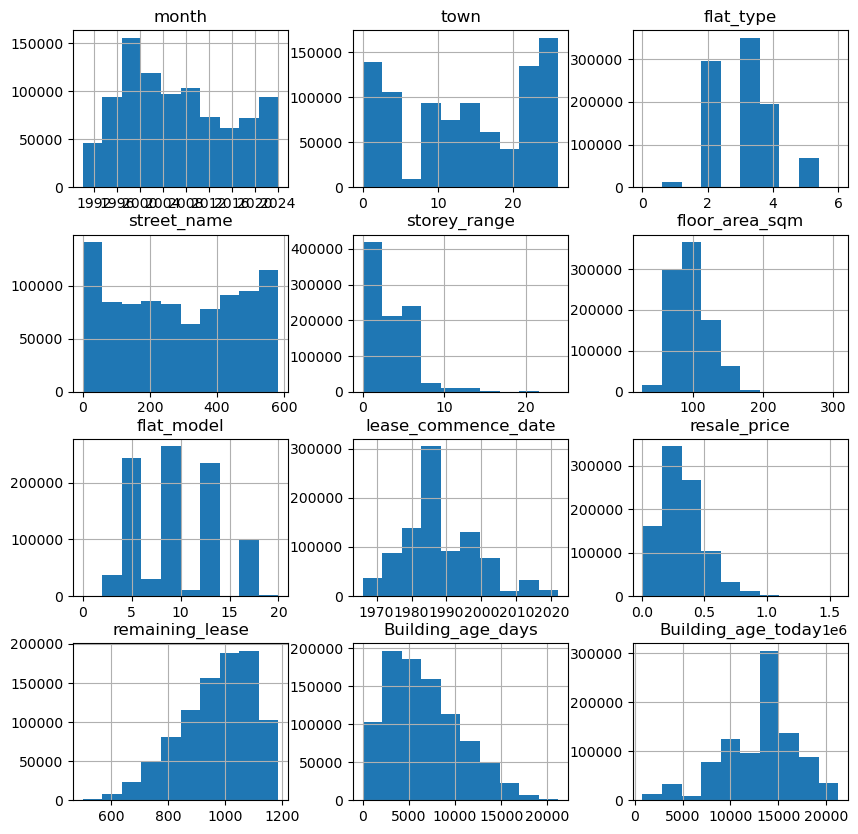

In [524]:
df_new.hist(figsize=(10,10))
plt.show()

In [525]:
numerical_columns = ['floor_area_sqm','resale_price','remaining_lease','Building_age_days']


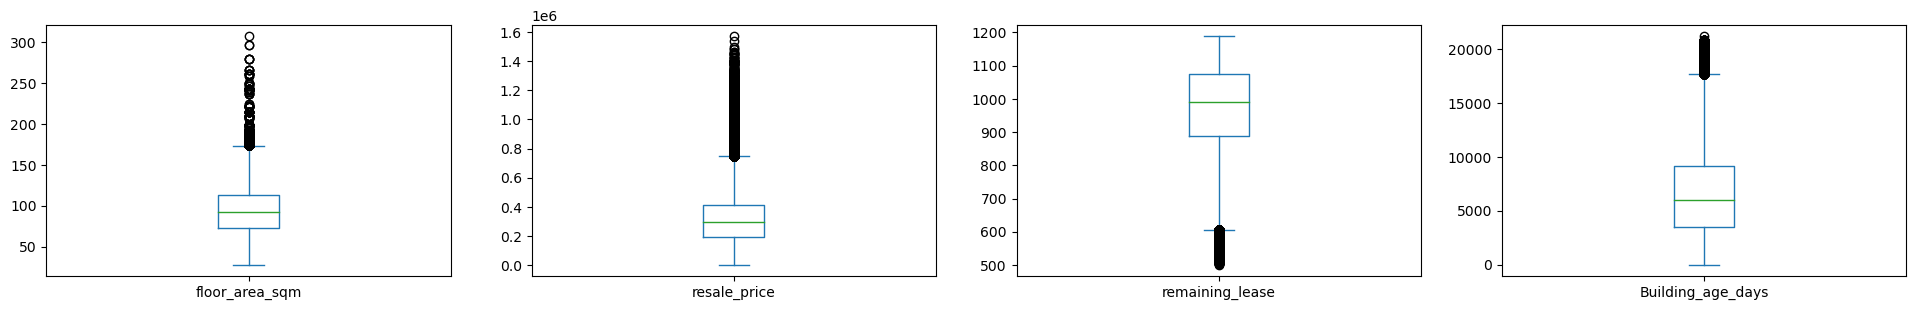

In [526]:
#Boxplot Visualization
fig = plt.figure(figsize=(24, 15))
for i in range(len(numerical_columns)):
    var = numerical_columns[i]
    sub = fig.add_subplot(4,4, i + 1)
    df_new[var].plot(kind = 'box')

### Bi-variate Analysis

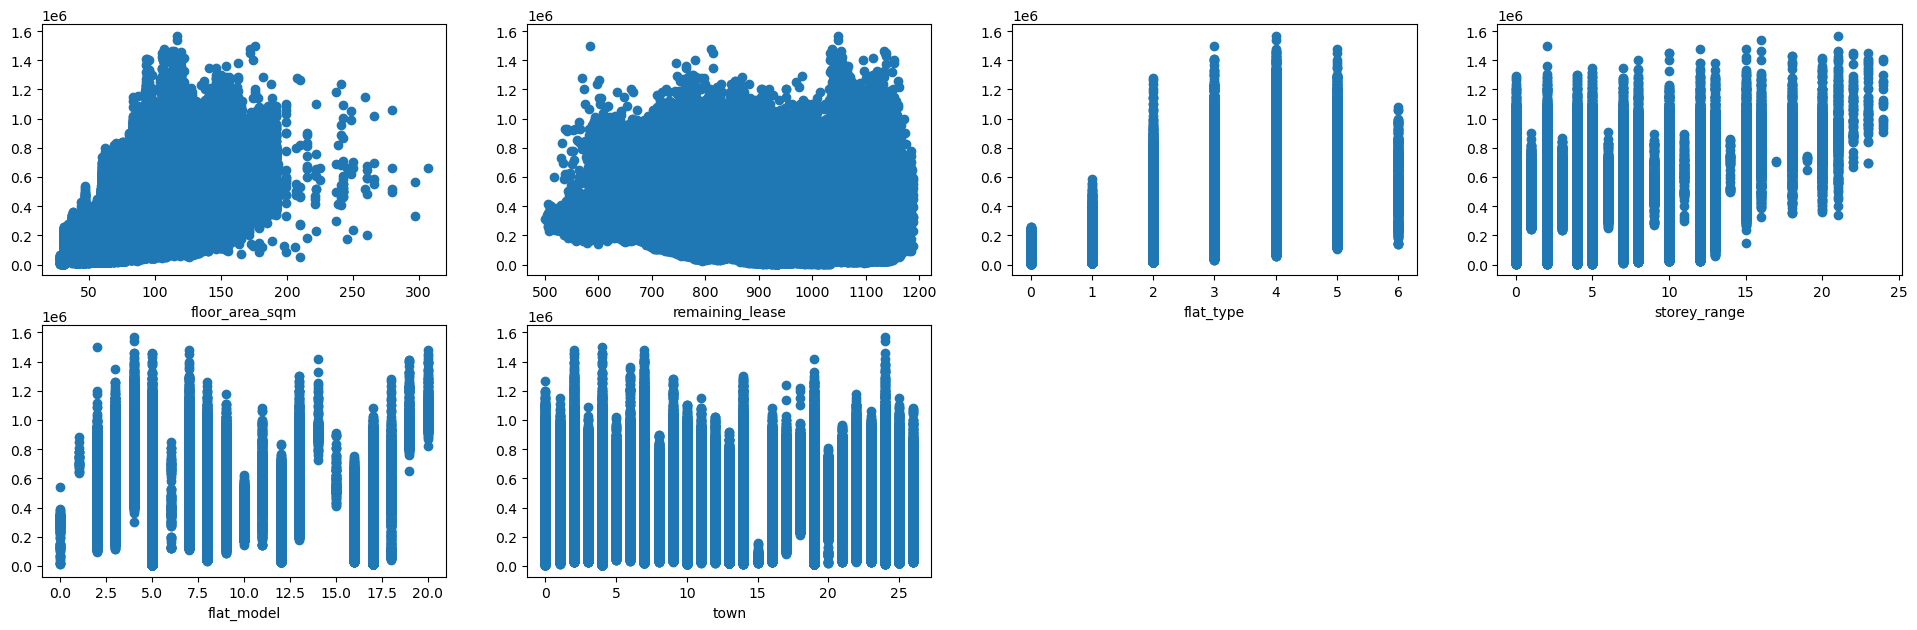

In [428]:
#Scatter Plot chart
scatter_columns = ['floor_area_sqm','remaining_lease','flat_type','storey_range','flat_model','town']
fig = plt.figure(figsize=(24, 15))
for i in range(len(scatter_columns)):
    var = df_new[scatter_columns[i]]
    sub = fig.add_subplot(4,4, i + 1)
    sub.set_xlabel(scatter_columns[i])
    plt.scatter(var,df_new['resale_price'])

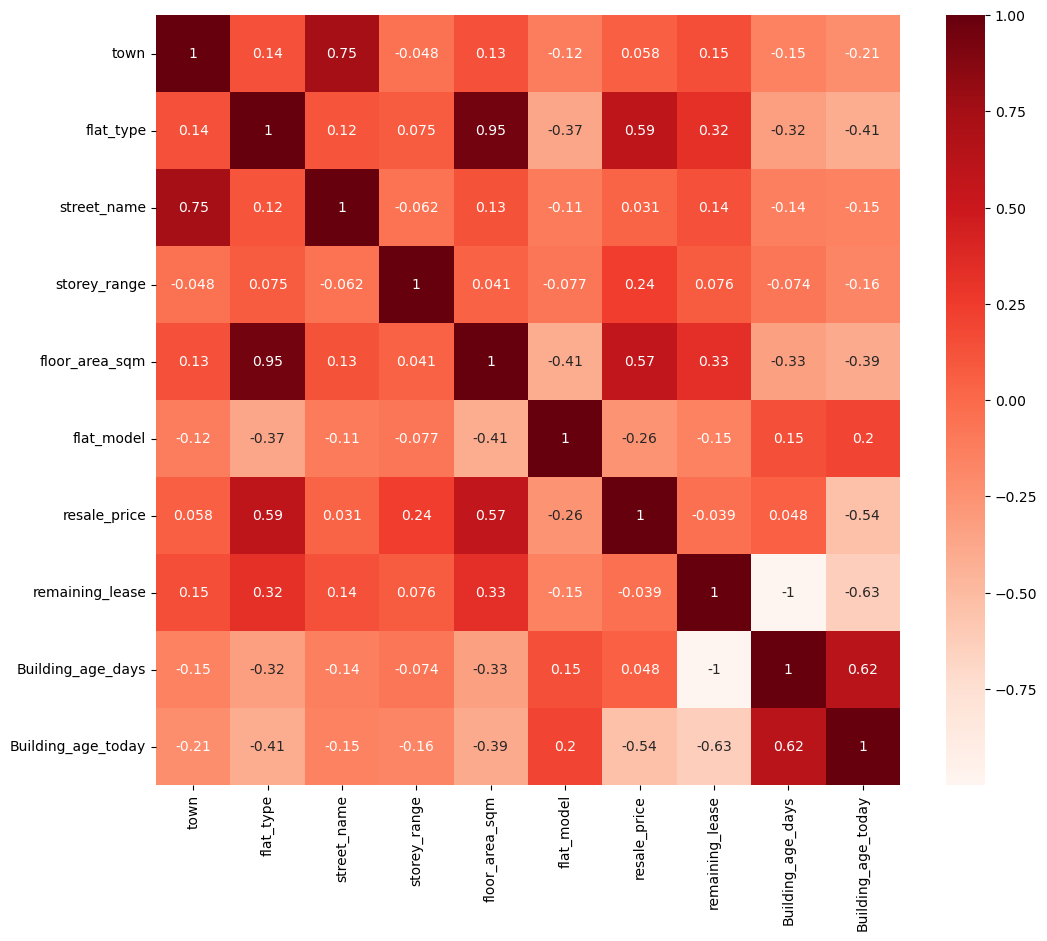

In [143]:
#Using Pearson Correlation
#Flat-type and Floor area sq-m,Town and Street name,Building age days and Remaining lease are highly correlated
plt.figure(figsize=(12,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [144]:
df_new.columns

Index(['month', 'town', 'flat_type', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Building_age_days', 'Building_age_today'],
      dtype='object')

In [155]:
# Splitting the independent and dependent variables
# Though Town and Street name is correlated by 0.75, selecting street name gives increased 1% accuracy
# Building age days and Floor-Area Sqm are highly correlated hence dropped as they have no impact on accuracy
indep_var = df_new.loc[:,['town', 'flat_type','street_name', 'storey_range', 'flat_model','remaining_lease', 
       'Building_age_today']]
target = df_new.loc[:,['resale_price']]

### Standardization

In [156]:
# standardization 
sc = StandardScaler()
scaled_data = sc.fit_transform(indep_var)

In [157]:
#Savig standard scaler
with open("standard_scalar.pkl",'wb') as f:
    pickle.dump(sc,f)

### Splitting data into Training,Validation and Testing dataset

In [158]:
# Split data to train and test set
X =scaled_data
y = target
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=1)

# Split (test) to split and validation
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)

In [159]:
#Function to return regression metrics
def reg_metrics(act,pred):
    print("Mean Squared Error: ", mean_squared_error(act,pred))
    print("Mean Absolute Error :", mean_absolute_error(act,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(act,pred)))
    print("R2 Score: ", r2_score(act,pred))

### Linear Regression

In [160]:
# FIT/TRAIN MODEL
reg = LinearRegression()
reg.fit(X_train, y_train)
# PREDICTIONS
y_pred_lin = reg.predict(X_val)
reg_metrics(y_val,y_pred_lin)

Mean Squared Error:  7041763918.454538
Mean Absolute Error : 61831.25936161704
Root Mean Squared Error:  83915.2186343725
R2 Score:  0.7526066314018174


### Decision Tree

In [161]:
#Regression Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
predt = tree.predict(X_val)
reg_metrics(y_val,predt)

Mean Squared Error:  983514519.5229108
Mean Absolute Error : 20673.08505752802
Root Mean Squared Error:  31361.03505184277
R2 Score:  0.9654468719957603


In [162]:
#Saving Decision Tree
with open("decision_tree.pkl",'wb') as f:
    pickle.dump(tree,f)

### Random Forest

In [163]:
#Random Forest
rand = RandomForestRegressor()
rand.fit(X_train, y_train.to_numpy().ravel())
pred_rand = rand.predict(X_val)
reg_metrics(y_val,pred_rand)

Mean Squared Error:  588223015.4942014
Mean Absolute Error : 16424.476499297987
Root Mean Squared Error:  24253.309372005326
R2 Score:  0.9793343720443799


In [96]:
#Savig Random Forest model
with open("random_forest.pkl",'wb') as f:
    pickle.dump(rand,f)

### AdaBoost Regressor

In [83]:
#Adaboost Regressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train.to_numpy().ravel())
pred_adab = adaboost.predict(X_val)
reg_metrics(y_val,pred_adab)

Mean Squared Error:  14489139381.903217
Mean Absolute Error : 102219.28215145237
Root Mean Squared Error:  120370.84107832435
R2 Score:  0.49022386124880934


### XGBoost Regressor

In [84]:
#XGBoost Regressor
xgb_reg =XGBRegressor()
xgb_reg.fit(X_train, y_train)
pred_xgb = xgb_reg.predict(X_val)
reg_metrics(y_val,pred_xgb)

Mean Squared Error:  1118911598.817201
Mean Absolute Error : 24508.71667751235
Root Mean Squared Error:  33450.13600595969
R2 Score:  0.9606329665679543


### Knn Regressor

In [87]:
kreg = KNeighborsRegressor()
kreg.fit(X_train, y_train)
pred_kreg = kreg.predict(X_val)
reg_metrics(y_val,pred_kreg)

Mean Squared Error:  1137602343.3669035
Mean Absolute Error : 21029.70447272543
Root Mean Squared Error:  33728.36111296995
R2 Score:  0.9599753639777803


### Huber Regressor

In [86]:
huber = HuberRegressor() 
huber.fit(X_train, y_train.to_numpy().ravel()) 
pred_huber = huber.predict(X_val)
reg_metrics(y_val,pred_huber)

Mean Squared Error:  7249770408.144776
Mean Absolute Error : 60615.05698595017
Root Mean Squared Error:  85145.58360916188
R2 Score:  0.744928952087199


### Testing Decision Tree, Random Forest, XGBoost, KNNregressor with Test data

In [89]:
#Decision Tree
predt_test = tree.predict(X_test)
reg_metrics(y_test,predt_test)

Mean Squared Error:  960405021.7045989
Mean Absolute Error : 20635.724934596587
Root Mean Squared Error:  30990.402090076193
R2 Score:  0.9661888721266718


In [90]:
#XGboost
pred_xgb_test = xgb_reg.predict(X_test)
reg_metrics(y_test,pred_xgb_test)

Mean Squared Error:  1114171350.5871375
Mean Absolute Error : 24464.737714396568
Root Mean Squared Error:  33379.205361828754
R2 Score:  0.9607755174575843


In [91]:
#KnnRegressor
pred_kreg_test = kreg.predict(X_test)
reg_metrics(y_test,pred_kreg_test)

Mean Squared Error:  1131108274.6255944
Mean Absolute Error : 21102.376573953356
Root Mean Squared Error:  33631.953178868374
R2 Score:  0.9601792518284972


In [92]:
#Random Forest
pred_rand_test = rand.predict(X_test)
reg_metrics(y_test,pred_rand_test)

Mean Squared Error:  574881970.7735882
Mean Absolute Error : 16435.65026851565
Root Mean Squared Error:  23976.696410756595
R2 Score:  0.9797612388662882
